In [16]:
import pandas as pd
import numpy as np
import math
import operator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import gridspec
warnings.filterwarnings("ignore")
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

In [17]:
col=['letter',
     'x-box',
     'y-box',
     'width',
     'height',
     'onpix',
     'x-bar',
     'y-bar',
     'x2bar',
     'y2bar',
     'xybar',
     'x2ybr',
     'xy2br',
     'x-ege',
     'xegvy',
     'y-ege',
     'yegvx']
letter=pd.read_csv("../dataset/letter.data",names=col)

In [18]:
letter.head()

,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [19]:
print("Total Data {0}".format(letter.letter.count()))
print("Total Kelas {0}".format((letter.letter.unique()).size))
max = 0
for types in letter.letter.unique():
    count = letter[letter.letter==types].letter.count()
    print("Kelas {0} : {1}".format(types, count))
    if(count>max):
        max = count
print("Maximum Data : {0}".format(max)) #813 (~814%2 == 0; 814/2 407 train, 407 test)

Total Data 20000
Total Kelas 26
Kelas T : 796
Kelas I : 755
Kelas D : 805
Kelas N : 783
Kelas G : 773
Kelas S : 748
Kelas B : 766
Kelas A : 789
Kelas J : 747
Kelas M : 792
Kelas X : 787
Kelas O : 753
Kelas R : 758
Kelas F : 775
Kelas C : 736
Kelas H : 734
Kelas W : 752
Kelas L : 761
Kelas P : 803
Kelas E : 768
Kelas V : 764
Kelas Y : 786
Kelas Q : 783
Kelas U : 813
Kelas K : 739
Kelas Z : 734
Maximum Data : 813


In [20]:
lbdata = letter[0:0] #letter balanced data
for types in letter.letter.unique():
    count = letter[letter.letter==types].letter.count()
    lbdata = pd.concat([lbdata,(letter[letter.letter==types])])
    lbdata = pd.concat([lbdata,(letter[letter.letter==types][:max-count+1])])
    
for types in lbdata.letter.unique():
    print("Kelas {0} : {1}".format(types, lbdata[lbdata.letter==types].letter.count()))

lbdata.head()

Kelas T : 814
Kelas I : 814
Kelas D : 814
Kelas N : 814
Kelas G : 814
Kelas S : 814
Kelas B : 814
Kelas A : 814
Kelas J : 814
Kelas M : 814
Kelas X : 814
Kelas O : 814
Kelas R : 814
Kelas F : 814
Kelas C : 814
Kelas H : 814
Kelas W : 814
Kelas L : 814
Kelas P : 814
Kelas E : 814
Kelas V : 814
Kelas Y : 814
Kelas Q : 814
Kelas U : 814
Kelas K : 814
Kelas Z : 814


,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
18,T,6,11,6,8,5,6,11,5,6,11,9,4,3,12,2,4
103,T,2,3,2,2,1,7,11,2,6,7,10,8,1,11,1,7
106,T,5,8,5,6,3,6,12,4,7,12,9,4,2,12,2,4
141,T,2,1,2,1,0,8,15,1,4,6,10,8,0,8,0,8


In [21]:
print(lbdata)

     letter  x-box  y-box  width  height  onpix  x-bar  y-bar  x2bar  y2bar  \
0         T      2      8      3       5      1      8     13      0      6   
18        T      6     11      6       8      5      6     11      5      6   
103       T      2      3      2       2      1      7     11      2      6   
106       T      5      8      5       6      3      6     12      4      7   
141       T      2      1      2       1      0      8     15      1      4   
...     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
2426      Z      8      8      6      11      5      7      7      4      3   
2527      Z      7      9      7       5      4      7      7      2      9   
2532      Z      2      1      2       2      1      7      7      3     11   
2588      Z      3      8      4       6      2      7      7      3     13   
2623      Z      4      8      5       6      2      7      7      4     14   

      xybar  x2ybr  xy2br  x-ege  xegvy  y-ege  yeg

In [22]:
train = lbdata[0:0]
test = lbdata[0:0]
tr_out, te_out = train_test_split(lbdata, test_size=0.5)
for types in lbdata.letter.unique():
    tr_out, te_out = train_test_split(lbdata[lbdata.letter == types], test_size=0.5)
    train = pd.concat([train, tr_out])
    test = pd.concat([test, te_out])

In [23]:
print("Training size : {0}".format(train['letter'].count()))
print("Test size : {0}".format(test['letter'].count()))
for types in lbdata.letter.unique():
    print("Kelas {0} : TR={1}|TE={2} ".format(types,train[train.letter==types].letter.count(),test[test.letter==types].letter.count()))

Training size : 10582
Test size : 10582
Kelas T : TR=407|TE=407 
Kelas I : TR=407|TE=407 
Kelas D : TR=407|TE=407 
Kelas N : TR=407|TE=407 
Kelas G : TR=407|TE=407 
Kelas S : TR=407|TE=407 
Kelas B : TR=407|TE=407 
Kelas A : TR=407|TE=407 
Kelas J : TR=407|TE=407 
Kelas M : TR=407|TE=407 
Kelas X : TR=407|TE=407 
Kelas O : TR=407|TE=407 
Kelas R : TR=407|TE=407 
Kelas F : TR=407|TE=407 
Kelas C : TR=407|TE=407 
Kelas H : TR=407|TE=407 
Kelas W : TR=407|TE=407 
Kelas L : TR=407|TE=407 
Kelas P : TR=407|TE=407 
Kelas E : TR=407|TE=407 
Kelas V : TR=407|TE=407 
Kelas Y : TR=407|TE=407 
Kelas Q : TR=407|TE=407 
Kelas U : TR=407|TE=407 
Kelas K : TR=407|TE=407 
Kelas Z : TR=407|TE=407 


In [32]:
with pd.ExcelWriter('../dataset/dataset.xlsx') as writer:
    train.to_excel(writer, sheet_name='train')
    test.to_excel(writer, sheet_name='test')

In [33]:
print(train.head())
print(test.head())

      letter  x-box  y-box  width  height  onpix  x-bar  y-bar  x2bar  y2bar  \
7461       T      3      6      4       4      2      6     12      2      7   
12137      T      6      8      6       6      3      4     12      3      8   
7873       T      2      1      3       2      1      6     12      3      6   
2867       T     10     14      8       8      4      7      8      3     10   
12136      T      5     10      7       7      8      6      8      4      6   

       xybar  x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
7461      11      9      4      1     11      2      5  
12137     12     10      4      1     10      2      5  
7873       8     11      7      2     11      1      7  
2867      13      6      6      2      9      5      5  
12136      7      6      9      5      8      5      6  
      letter  x-box  y-box  width  height  onpix  x-bar  y-bar  x2bar  y2bar  \
10132      T      7      9      8       8      8      6      8      3      9   
5668       T     

Histogram Train masing-masing fitur data


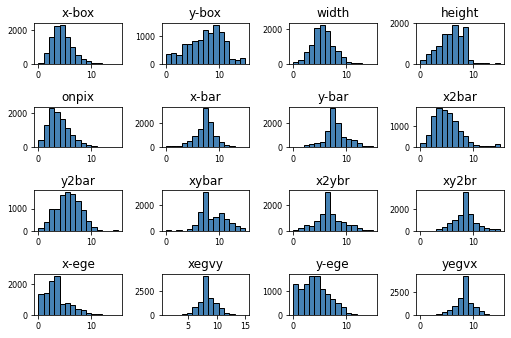

In [34]:
%matplotlib inline
print("Histogram Train masing-masing fitur data")
train.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)   
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

Histogram Test masing-masing fitur data


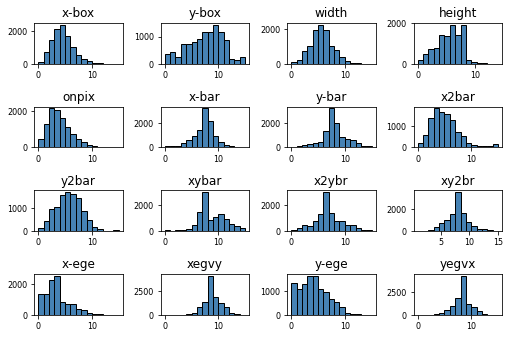

In [35]:
%matplotlib inline
print("Histogram Test masing-masing fitur data")
test.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)   
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

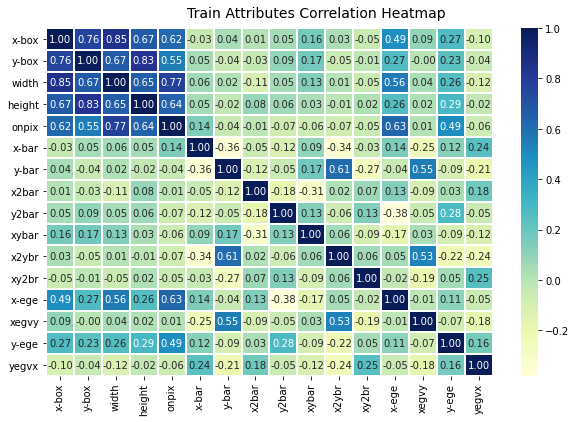

In [36]:
%matplotlib inline
f, ax = plt.subplots(figsize=(10, 6))
corr = train.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="YlGnBu",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Train Attributes Correlation Heatmap', fontsize=14)

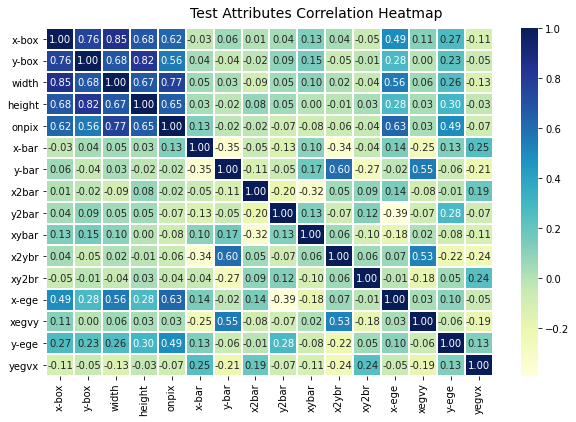

In [37]:
%matplotlib inline
f, ax = plt.subplots(figsize=(10, 6))
corr = test.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="YlGnBu",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Test Attributes Correlation Heatmap', fontsize=14)

In [38]:
train.describe()

,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.00000
mean,3.999716,7.015687,5.097524,5.349839,3.484785,6.896617,7.491022,4.598469,5.201096,8.310244,6.443300,7.938386,3.013986,8.332829,3.692308,7.81100
std,1.897352,3.299718,2.005930,2.250684,2.187788,2.038540,2.328204,2.667096,2.380180,2.489567,2.621213,2.082275,2.336213,1.552404,2.567382,1.60615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000


In [39]:
test.describe()

,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,10582.000000,10582.000000,10582.000000,10582.00000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,4.041864,7.054527,5.136269,5.39312,3.515498,6.895861,7.492723,4.647704,5.183047,8.262899,6.440654,7.965035,3.050936,8.335286,3.716027,7.807031
std,1.933945,3.315806,2.030518,2.27536,2.191282,2.027671,2.311057,2.724239,2.398895,2.498097,2.625477,2.072978,2.328059,1.526640,2.583190,1.620618
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.000000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,4.000000,8.000000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.000000
max,15.000000,15.000000,15.000000,14.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000


In [40]:
%matplotlib notebook
colors = {
  'A':'maroon',#A
  'B':'springgreen',#B
  'C':'salmon',#C
  'D':'hotpink',#D
  'E':'blue',#E
  'F':'y',#F
  'G':'lawngreen',#G
  'H':'navy',#H
  'I':'red',#I
  'J':'aquamarine',#J
  'K':'lightseagreen',#K
  'L':'c',#L
  'M':'purple',#M
  'N':'deepskyblue',#N
  'O':'dodgerblue',#O
  'P':'g',#P
  'Q':'gold',#Q
  'R':'mediumpurple',#R
  'S':'darkorchid',#S
  'T':'aqua',#T
  'U':'magenta',#U
  'V':'crimson',#V
  'W':'pink',#W
  'X':'black',#X
  'Y':'grey',#Y
  'Z':'lightgray',#Z
    }
def generateColorLetter(data):
    counter = 0
    data = data.sort_values(by=['letter'], ascending=True)
    data['color'] = ''
    data['letterID'] = ''
    for letter in data.letter.unique():
        data.letterID[data.letter == letter]  = counter
        data.color[data.letter == letter] = colors[letter]
        counter += 1
    return data

In [41]:
print(train.tail())
print(test.head())

      letter  x-box  y-box  width  height  onpix  x-bar  y-bar  x2bar  y2bar  \
9843       Z      3      7      5       5      2      8      7      2     10   
4597       Z      3      7      4       5      2      7      7      4     14   
221        Z      2      6      3       4      1      7      7      3     13   
11386      Z      6     11      8       9      8     10      7      5      4   
10025      Z      4      9      5       6      5      7      7      5      9   

       xybar  x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
9843      11      5      9      1      8      6      9  
4597       9      6      8      0      8      8      8  
221        9      6      8      0      8      8      8  
11386      7      5      7      4      8     10      5  
10025      7      6      8      1      8      7      8  
      letter  x-box  y-box  width  height  onpix  x-bar  y-bar  x2bar  y2bar  \
10132      T      7      9      8       8      8      6      8      3      9   
5668       T     

In [42]:
def scatter(data, name, x, y,colors):
    data = generateColorLetter(data)
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(8)
    xmax = 0
    ymax = 0
    counter = 0
    for letter in data.letter.unique():
        counts = data[data.letter == letter].groupby(['color',x, y]).size().reset_index(name='counts')
        plt.scatter(counts[x], counts[y], s = counts.counts*50, label=letter, facecolor='none',
                    edgecolor=counts['color'])
        xmax = counts[x].max() if xmax<counts[x].max() else xmax
        ymax = counts[y].max() if ymax<counts[y].max() else ymax
        counter += 1
    plt.xlim([-1,xmax + 1])
    plt.ylim([-1,ymax + 1])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.title("{0} vs {1} Scatter Map of {0} Dataset".format(x,y,name))
    plt.show()

<IPython.core.display.Javascript object>


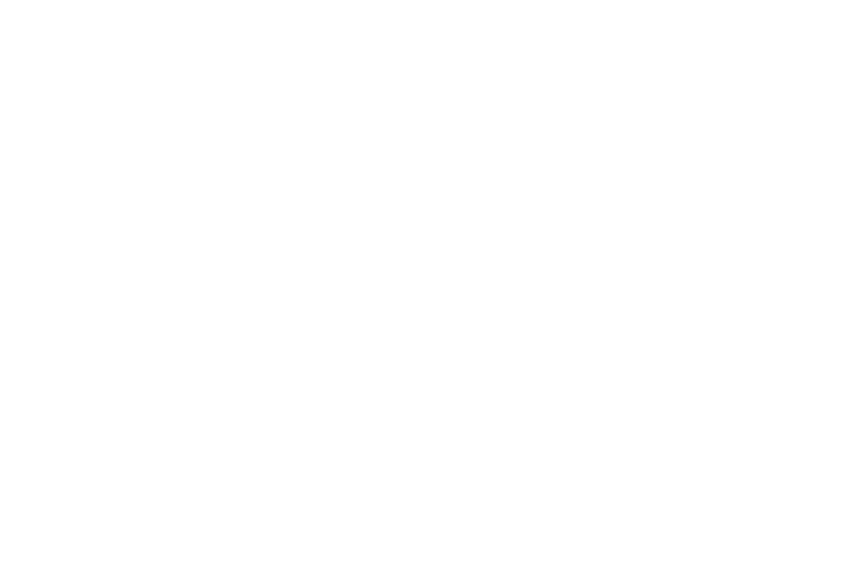

<IPython.core.display.Javascript object>


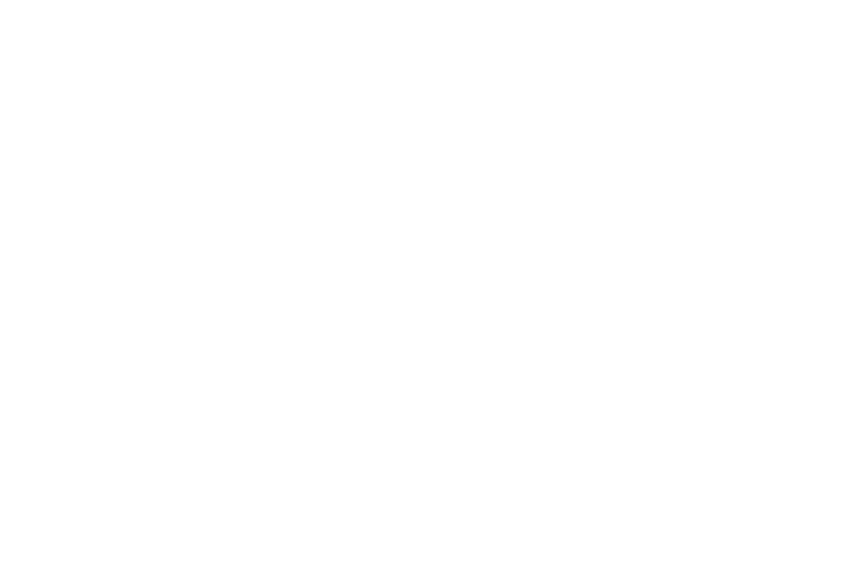

In [43]:
scatter(train, "Train",'height','width',colors)
scatter(test, "Test",'height','width',colors)

In [44]:
def scatter3d(data,x,y, dataName):
    data = generateColorLetter(data)
    fig = plt.figure(figsize = (12, 8))
    ax = plt.axes(projection ="3d")
    ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.3,
            alpha = 0.2)
    data = data.groupby(['letterID', 'color', x, y]).size().reset_index(name='counts')
    sctt = ax.scatter3D(data.letterID, data[x], data[y],  alpha = 0.5, s=data['counts']*20, c=data['color'])
    plt.title("{0} vs {1} by Letter of {2} dataset".format(x, y,dataName))
    ax.set(xticks=range(0,26), xticklabels=[
        'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'
    ]) 
    ax.set_ylabel(x, fontweight ='bold')
    ax.set_xlabel('Letter', fontweight ='bold')
    ax.set_zlabel(y, fontweight ='bold')
    plt.show()

<IPython.core.display.Javascript object>


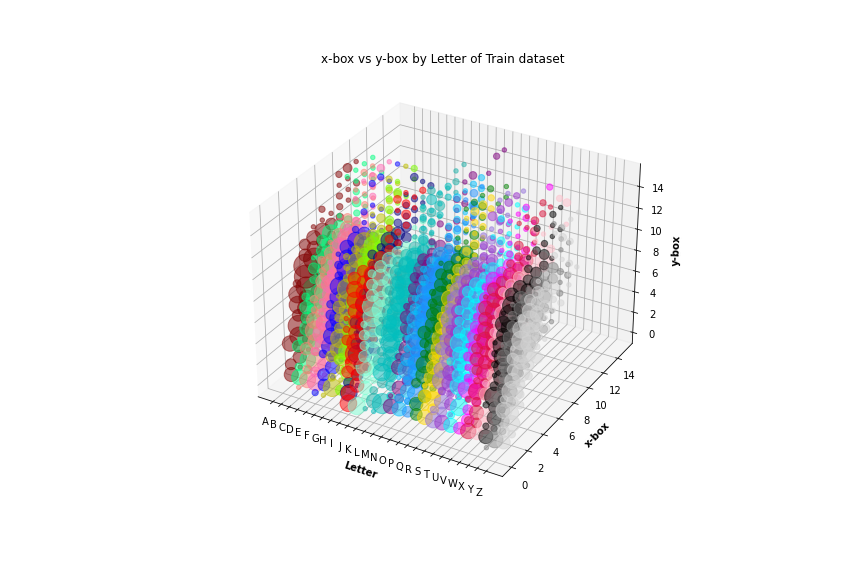

In [45]:
%matplotlib notebook
scatter3d(train,'x-box','y-box',"Train")

In [46]:
def scatterAletter(data, letter, x, y, name):
    f = plt.figure()
    f.set_figwidth(8)
    f.set_figheight(4)
    data = generateColorLetter(data)
    counts = data[data.letter == letter].groupby(['color',x, y]).size().reset_index(name='counts')
    plt.scatter(counts[x], counts[y], s = counts.counts*8, label=letter, c=counts['color'])
    plt.xlim([-1,16])
    plt.ylim([-1,16])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.title("{0} vs {1} Scatter Map of {0} Dataset".format(x,y,name))
    plt.show()

In [47]:
def generateDistDiagram(data, columns, name): 
    data = generateColorLetter(data)
    for letter in data.letter.unique():
        data = generateColorLetter(data)
        fig = plt.figure("Letter : " + letter)
        fig.set_figheight(3)
        fig.set_figwidth(8)
        for cl in columns:
            sns.kdeplot(data[data.letter == letter][cl], shade = True, label = cl)
        plt.legend()
        plt.xlabel("Value")
        plt.title("Distribution diagram of Letter " + letter + " in " + name)

<IPython.core.display.Javascript object>


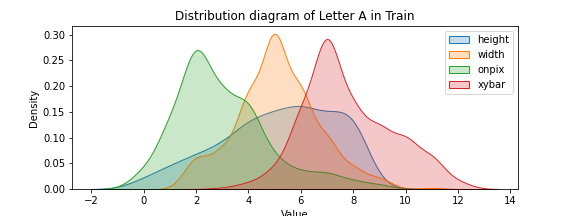

<IPython.core.display.Javascript object>


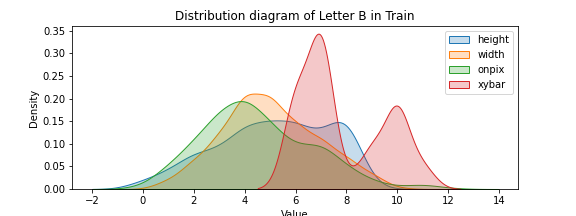

<IPython.core.display.Javascript object>


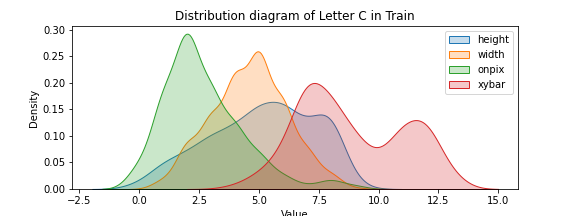

<IPython.core.display.Javascript object>


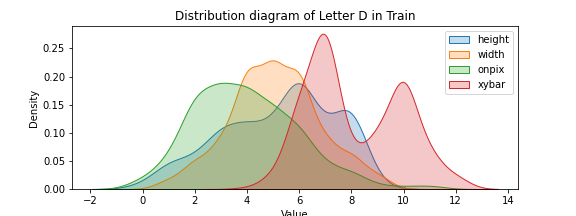

<IPython.core.display.Javascript object>


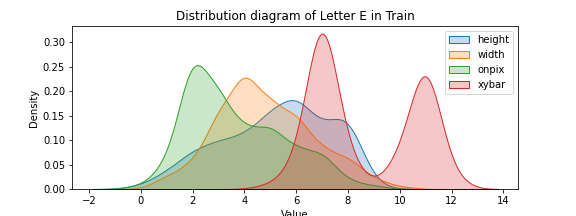

<IPython.core.display.Javascript object>


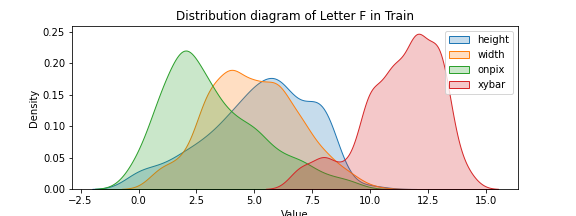

<IPython.core.display.Javascript object>


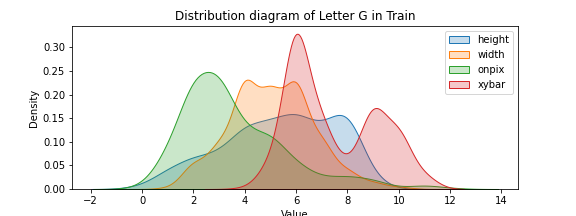

<IPython.core.display.Javascript object>


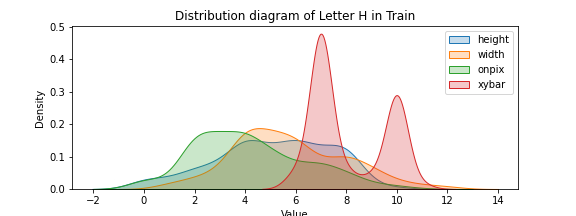

<IPython.core.display.Javascript object>


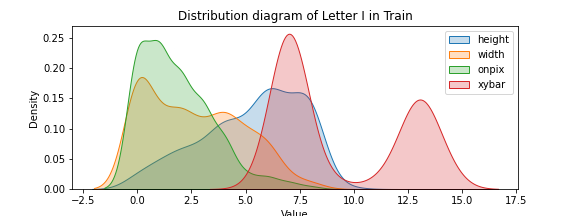

<IPython.core.display.Javascript object>


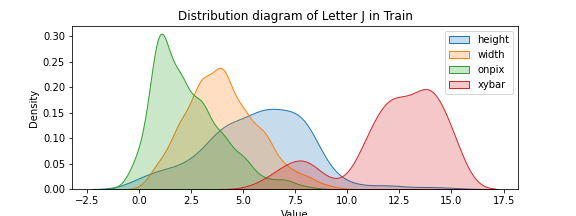

<IPython.core.display.Javascript object>


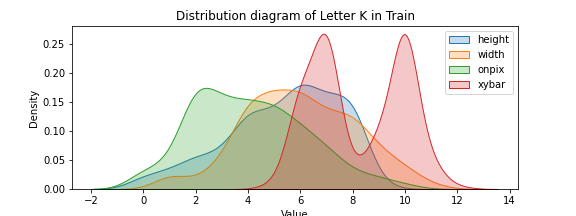

<IPython.core.display.Javascript object>


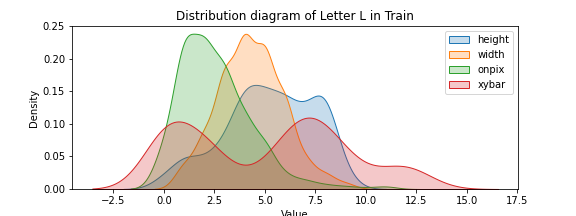

<IPython.core.display.Javascript object>


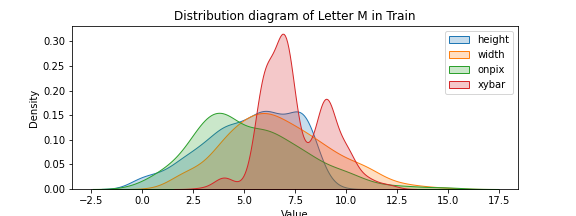

<IPython.core.display.Javascript object>


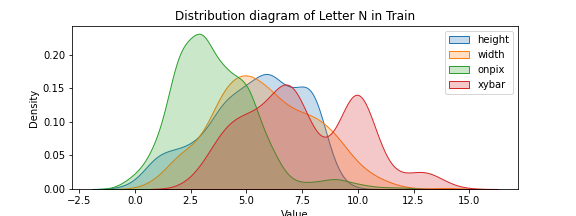

<IPython.core.display.Javascript object>


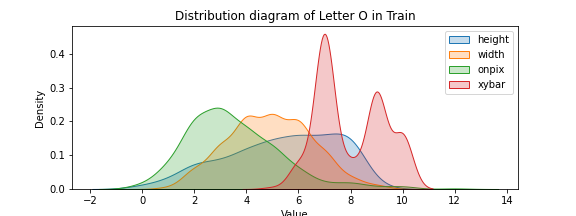

<IPython.core.display.Javascript object>


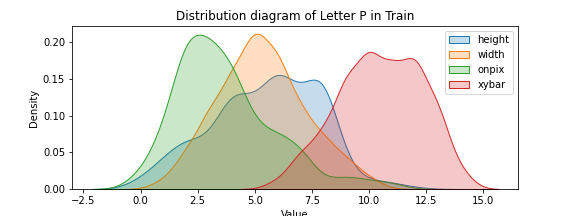

<IPython.core.display.Javascript object>


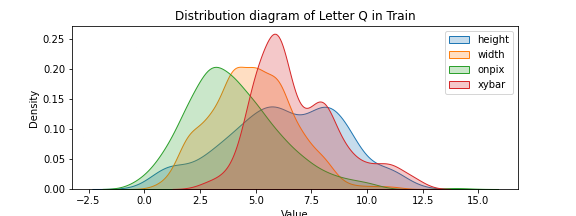

<IPython.core.display.Javascript object>


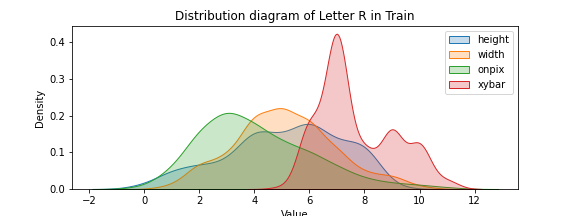

<IPython.core.display.Javascript object>


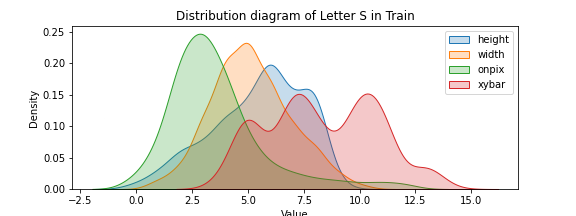

<IPython.core.display.Javascript object>


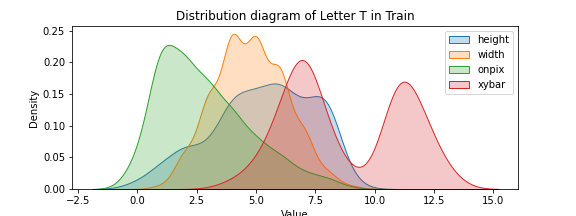

<IPython.core.display.Javascript object>


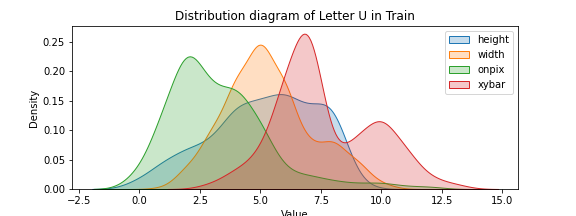

<IPython.core.display.Javascript object>


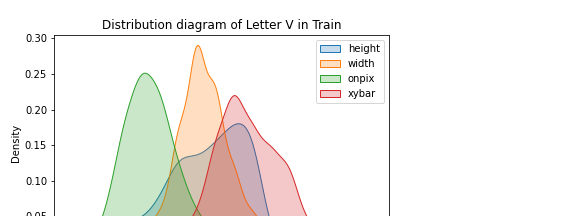

<IPython.core.display.Javascript object>


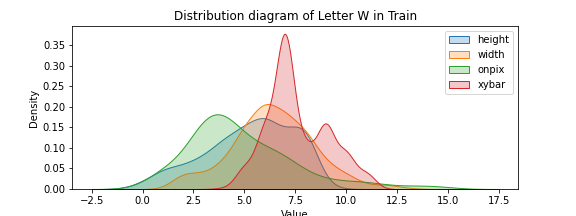

<IPython.core.display.Javascript object>


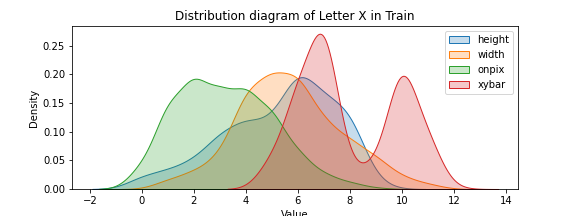

<IPython.core.display.Javascript object>


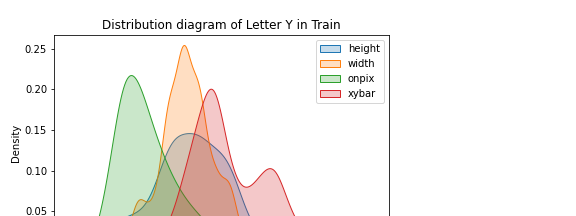

<IPython.core.display.Javascript object>


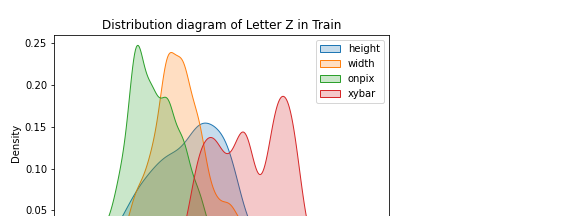

In [48]:
generateDistDiagram(train, ['height', 'width','onpix', 'xybar'], "Train")